#### sklearn.tree.DecisionTreeClassifier¶
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state= 156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
pred=dt_clf.predict(X_test)

In [3]:
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [4]:
from sklearn.metrics import accuracy_score

print(f'정확도는: {accuracy_score(y_test, pred)}')

정확도는: 0.9333333333333333


In [5]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

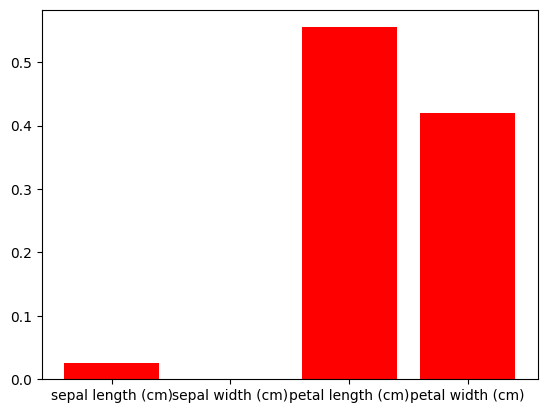

In [6]:
import matplotlib.pyplot as plt
plt.bar(iris_data.feature_names,dt_clf. feature_importances_,  color='red')
plt.show()

In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

feature importance는 petal length와 petal width가 높다.

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
feature_names=iris_data.feature_names, impurity = True, filled=True)

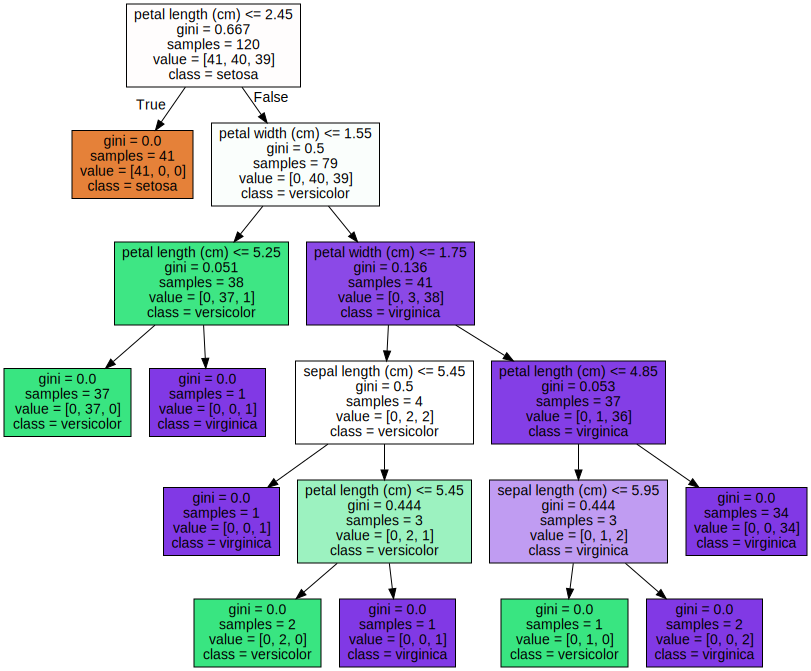

In [9]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)   

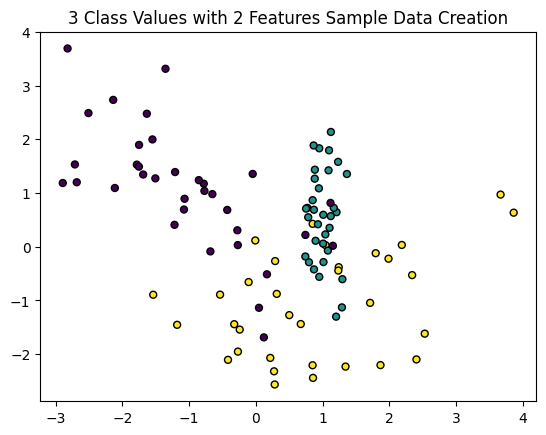

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class Values with 2 Features Sample Data Creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

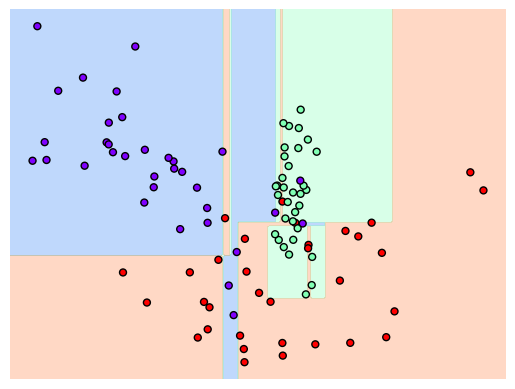

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

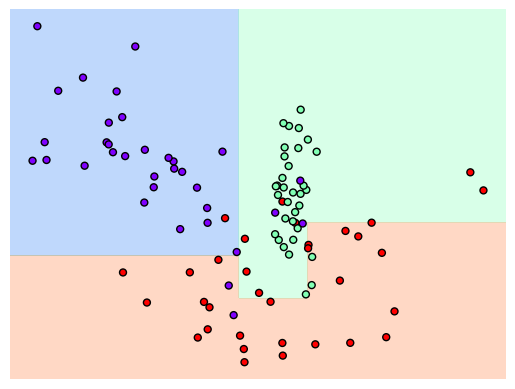

In [13]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화.
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

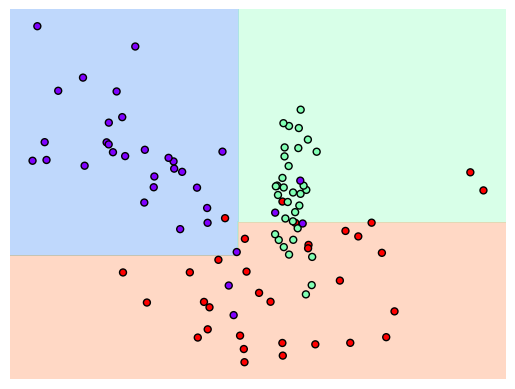

In [14]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화.
dt_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

#### 결정 나무 실습-사용자 행동 인식 데이터 세트

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

feature_name_df=pd.read_csv('./datasets/human_activity/features.txt', sep='\s+',
                             header=None, names = ['column_index', 'column_name'])

feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [16]:
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [19]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                               columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                           if x[1]>0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [20]:
import pandas as pd

def get_human_dataset():
    # 공백 데이터를 분리하게 위해 공백 문자를 sep로 할당시켜 줌.
    feature_name_df = pd.read_csv('./datasets/human_activity/features.txt', sep='\s+',
                             header=None, names = ['column_index', 'column_name'])
    
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    
    # 피처명을 칼럼으로 부여해 주기 위해서 리스트 객체로 다시 변환하여 준다.
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처, 데스트 피처를 DataFrame으로 로딩하고, 칼럼명은 feature_name 으로 적용헤 준다.
    X_train= pd.read_csv('./datasets/human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test= pd.read_csv('./datasets/human_activity/test/X_test.txt',sep='\s+',names=feature_name)
                        
    # 학습 레이블과 테스트 레이블을 DataFrame으로 로딩하고, 칼럼명은 action으로 적용해 준다.
    y_train= pd.read_csv('./datasets/human_activity/train/y_train.txt',sep='\s+', header=None, names=['action'])
    y_test= pd.read_csv('./datasets/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
                        
    # 학습&테스트용 DataFrame을 모두 반환 시킴.
    return X_train, X_test, y_train, y_test
                        
X_train, X_test, y_train, y_test = get_human_dataset()

In [22]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [23]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [24]:
X_train.isna().sum().sum()

0

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도:0.854768
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [26]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [29]:
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [30]:
max_depths=[6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth,random_state=156)
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test, pred)
    print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.8558
max_depth=8 정확도: 0.8707
max_depth=10 정확도: 0.8673
max_depth=12 정확도: 0.8646
max_depth=16 정확도: 0.8575
max_depth=20 정확도: 0.8548
max_depth=24 정확도: 0.8548


In [ ]:
params={'max_depth':[6,8,10,12,16,20,24],
       'min_samples_split':[16,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

In [32]:
best_df_clf=grid_cv_best_estimator_timator_timator_timator_timator_timator_timator_est_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test, ped1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

NameError: name 'ped1' is not defined

#### sklearn.ensemble.RandomForestClassifier
* class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

#### sklearn.ensemble.RandomForestRegressor
* class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(random_state=0)


# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf), ('DC', dt_clf), ('RF', rf_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [dt_clf, lr_clf, knn_clf, rf_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    #print(f'{class_name} 정확도 : {accuracy_score(y_test, pred)}')

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                               columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                             if x[1]>0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():
    
    feature_name_df=pd.read_csv('./datasets/human_activity/features.txt', sep='\s+',
                             header=None, names = ['column_index', 'column_name'])
    
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    feature_name_df=new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train=pd.read_csv('./datasets/human_activity/features.txt', sep='\s+', names = ['column_index', 'column_name'])
    X_test=pd.read_csv('./datasets/human_activity/features.txt', sep='\s+', names = ['column_index', 'column_name'])
    
    y_train=pd.read_csv('./datasets/human_activity/features.txt', sep='\s+',
                             header=None, names = ['column_index', 'column_name'])
    y_test=pd.read_csv('./datasets/human_activity/features.txt', sep='\s+',
                             header=None, names = ['column_index', 'column_name'])
                       
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test=get_human_dataset()
